In [13]:
# -*- coding: utf-8 -*-

from tensorflow import keras
from keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy as np
import tensorflow as tf


데이터 불러오기

In [18]:
df = pd.read_csv("/content/cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


캐글에서 받은 데이터의 컬럼명에 공백이 있기에 컬럼명 공백 제거

In [19]:
df.columns = df.columns.str.strip()
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


### 공백이 제거된 컬럼명으로 업데이트, 이진 변수 변환
(Yes, NO => True, False)

In [20]:
df.to_csv("/content/cancer_preprocessed.csv", index=False)
df.to_excel("/content/cancer_preprocessed.xlsx", index=False)


## 시각화

흡연 여부별 폐암 비율 비교

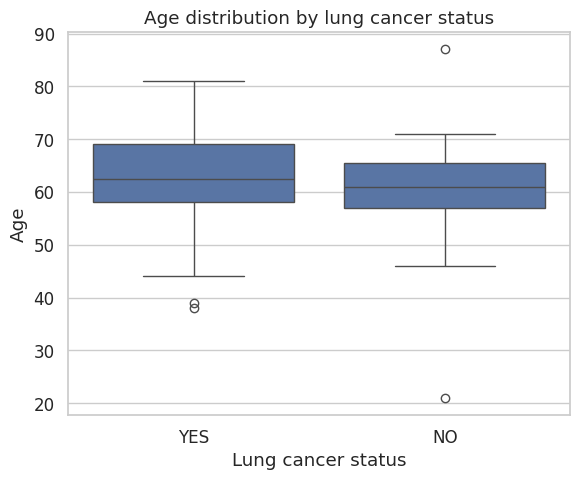

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/content/cancer_preprocessed.xlsx")

candidate_cols = ["TARGET", "LUNG_CANCER"]
for col in candidate_cols:
    if col in df.columns:
        df["TARGET"] = df[col]
        break
else:
    raise ValueError("No target column (lung‑cancer label) found in the dataset.")

def boxplot_age():
    sns.set(style="whitegrid", context="notebook", font_scale=1.1)
    plt.figure(figsize=(6, 5))
    ax = sns.boxplot(data=df, x="TARGET", y="AGE")
    uniq = sorted(df["TARGET"].unique())
    if set(uniq) == {0, 1}:
        ax.set_xticklabels(["No Cancer", "Cancer"])
    ax.set_xlabel("Lung cancer status")
    ax.set_ylabel("Age")
    ax.set_title("Age distribution by lung cancer status")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    boxplot_age()


지표별 상관계수

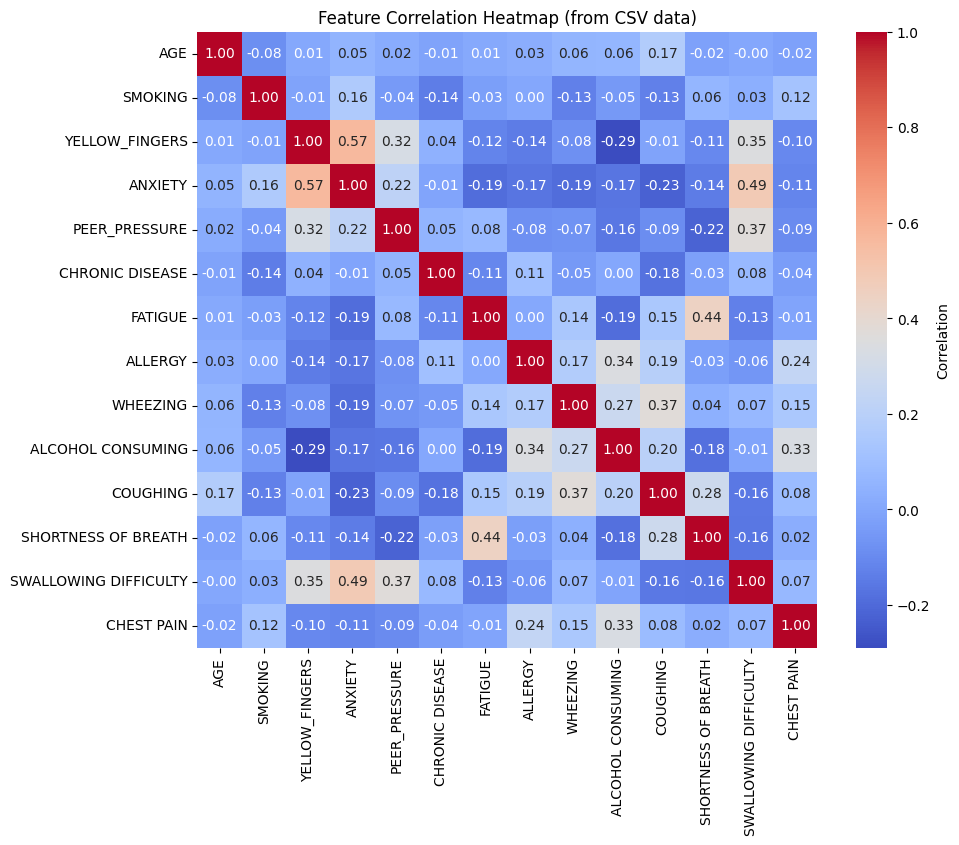

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 로드
df = pd.read_csv('/content/cancer_preprocessed.csv')

# 상관계수 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Heatmap (from CSV data)')
plt.show()

흡연자 vs 비흡연자 폐암 발생 비율

/tmp/ipython-input-32-1310390969.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Non-smoker", "Smoker"])


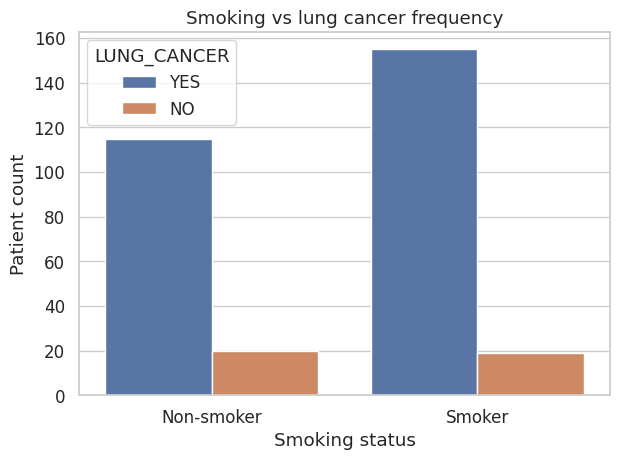

In [32]:
import seaborn as sns, matplotlib.pyplot as plt

def bar_smoking():
    sns.set(style="whitegrid", font_scale=1.1)
    ax = sns.countplot(data=df, x="SMOKING", hue="LUNG_CANCER")

    ax.set_xticklabels(["Non-smoker", "Smoker"])
    ax.set_xlabel("Smoking status")
    ax.set_ylabel("Patient count")
    ax.set_title("Smoking vs lung cancer frequency")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    bar_smoking()


“범주형/이진 변수들 수치화 → 결측치 제거 → 학습용 Feature/Target 구분”

In [33]:
binary_cols=['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
             'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
             'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

for col in binary_cols:
    if col in df.columns:
        for idx in df.index:
            if df.loc[idx, col] == 2:
                df.loc[idx, col] = 1
            elif df.loc[idx, col] == 1:
                df.loc[idx, col] = 0

df = pd.get_dummies(df)

df = df.fillna(df.mean())

# 공백이 제거된 컬럼명으로 업데이트함
cols_train = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
              'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
              'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN',
              'AGE', 'GENDER_F', 'GENDER_M']

X_data = df[cols_train]
y_data = df['LUNG_CANCER_YES']

X_data = X_data.astype(float)
y_data = y_data.astype(float)

모델 학습

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(30, input_dim=16, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

modelpath="/content/test5.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                   validation_split=0.25, verbose=1,
                    callbacks=[early_stopping_callback,checkpointer])

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'최종 성능: 폐암 예측 분류 accuracy {test_acc*100:.1f}%')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 995 (3.89 KB)

 Trainable params: 995 (3.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5625 - loss: 0.6995
Epoch 1: val_loss improved from inf to 0.42881, saving model to /content/test5.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6307 - loss: 0.6358 - val_accuracy: 0.9032 - val_loss: 0.4288
Epoch 2/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6562 - loss: 0.6197
Epoch 2: val_loss improved from 0.42881 to 0.37347, saving model to /content/test5.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7216 - loss: 0.5756 - val_accuracy: 0.9032 - val_loss: 0.3735
Epoch 3/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.7500 - loss: 0.5816
Epoch 3: val_loss improved from 0.37347 to 0.34482, saving model to /content/test5.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7713 - loss: 0.5547 - val_accuracy: 0.9032 - val_loss: 0.3448
Epoch 4/50
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.6562 - loss: 0.7028
Epoch 4: val_loss improved from 0.34482 to 0.33138, saving mod

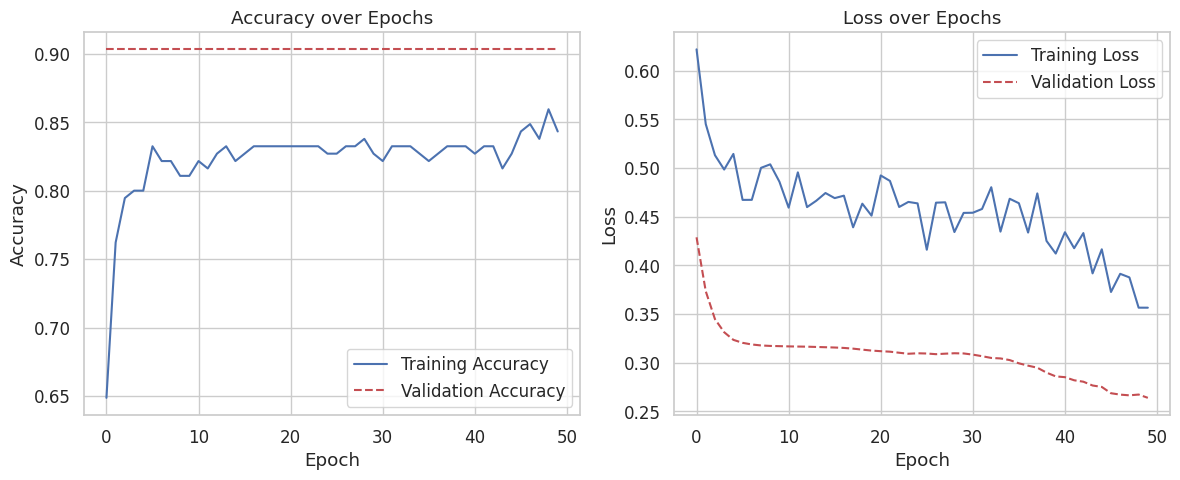

In [35]:
import matplotlib.pyplot as plt

# 정확도 그래프
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r--', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


## 최종 데이터셋으로 성능분석!! 키키

임의의 테스트 데이터 생성  후 성능평가

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
   AGE  SMOKING  True_Label  Predicted_Prob  Predicted_Label
0   55        1           1        0.943416                1
1   42        0           0        0.613599                1
2   60        1           1        0.943516                1
3   95        1           0        0.461743                0
4   70        1           1        0.943790                1

✅ Accuracy: 0.8

✅ Classification Report:
              precision    recall  f1-score   support

   No Cancer       1.00      0.50      0.67         2
      Cancer       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



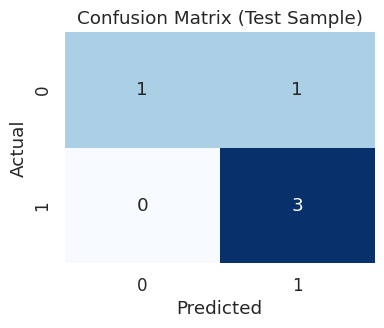

In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 학습했던 feature 컬럼
cols_train = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
              'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
              'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN',
              'AGE', 'GENDER_F', 'GENDER_M']

# 테스트용 가짜 데이터 (5개)
test_samples = pd.DataFrame({
    'SMOKING': [1, 0, 1, 1, 1],
    'YELLOW_FINGERS': [1, 0, 1, 0, 1],
    'ANXIETY': [0, 1, 0, 1, 1],
    'PEER_PRESSURE': [1, 0, 1, 0, 1],
    'CHRONIC DISEASE': [1, 0, 0, 1, 1],
    'FATIGUE': [1, 0, 1, 1, 0],
    'ALLERGY': [0, 1, 0, 1, 0],
    'WHEEZING': [1, 0, 1, 0, 1],
    'ALCOHOL CONSUMING': [1, 0, 1, 0, 1],
    'COUGHING': [1, 0, 1, 0, 1],
    'SHORTNESS OF BREATH': [1, 0, 1, 0, 1],
    'SWALLOWING DIFFICULTY': [1, 0, 1, 0, 1],
    'CHEST PAIN': [1, 0, 1, 0, 1],
    'AGE': [55, 42, 60, 95, 70],
    'GENDER_F': [1, 0, 1, 0, 1],
    'GENDER_M': [0, 1, 0, 1, 0]
})

# 정답값 (예시로 적당히 넣음. 너가 원하면 수정 가능)
y_true = np.array([1, 0, 1, 0, 1])  # YES=1, NO=0

# 예측
X_new = test_samples.astype(float)
y_pred_prob = model.predict(X_new)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# 결과 데이터프레임
result_df = test_samples.copy()
result_df['True_Label'] = y_true
result_df['Predicted_Prob'] = y_pred_prob.flatten()
result_df['Predicted_Label'] = y_pred

print(result_df[['AGE', 'SMOKING', 'True_Label', 'Predicted_Prob', 'Predicted_Label']])

# 성능지표
print("\n✅ Accuracy:", accuracy_score(y_true, y_pred))
print("\n✅ Classification Report:")
print(classification_report(y_true, y_pred, target_names=['No Cancer', 'Cancer']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Test Sample)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()